In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option("display.max_columns", None)
DataFrame = pd.read_csv('acetylcholinesterase_raw.csv')

In [4]:
DataFrame.drop(DataFrame[(DataFrame['standard_type'] != 'IC50') & (DataFrame['standard_type'] != 'Ki')].index,inplace=  True)

In [5]:
DataFrame.standard_type.value_counts()

IC50    7549
Ki      1827
Name: standard_type, dtype: int64

In [6]:
columns = ['activity_comment','activity_id','activity_properties','assay_chembl_id','document_chembl_id','assay_description','assay_type','assay_variant_accession','assay_variant_mutation','bao_endpoint','bao_format','bao_label','data_validity_comment','data_validity_description','document_journal','document_year','ligand_efficiency','molecule_pref_name','potential_duplicate','qudt_units','record_id','relation','standard_relation','src_id','standard_flag','standard_units','standard_text_value','standard_upper_value','value','type','target_organism','target_pref_name','target_tax_id','text_value','toid','units','uo_units','upper_value','pchembl_value','parent_molecule_chembl_id','target_chembl_id']     

In [7]:
DataFrame.drop(columns,axis=1,inplace = True)

In [8]:
DataFrame.duplicated(keep = 'last').sum()

552

In [9]:
DataFrame.drop_duplicates(keep = 'first',inplace = True)

In [10]:
DataFrame.shape

(8824, 4)

In [11]:
DataFrame.dropna(subset= ['canonical_smiles'],inplace = True)

In [12]:
DataFrame.shape

(8757, 4)

In [13]:
def Ki_conversion():
    for value in DataFrame[DataFrame['standard_type'] == 'Ki'].index:
        DataFrame.standard_value[value]*2
Ki_conversion()

In [14]:
DataFrame[DataFrame['standard_type'] == 'Ki']

,canonical_smiles,molecule_chembl_id,standard_type,standard_value
208,COc1ccccc1CN(C)CCCCCC(=O)N(C)CCCCCCCCN(C)C(=O)...,CHEMBL11805,Ki,0.104
211,CCC1=CC2Cc3nc4cc(Cl)ccc4c(N)c3[C@@H](C1)C2,CHEMBL208599,Ki,0.026
213,CC[N+](C)(C)c1cccc(O)c1.[Br-],CHEMBL60745,Ki,1.630
728,CC(C)C(NC(=O)Cn1c(-c2ccccc2)ccc(NC(=O)OCc2cccc...,CHEMBL11391,Ki,NaN
809,Nc1c2c(nc3ccccc13)CCCC2,CHEMBL95,Ki,151.000
...,...,...,...,...
14292,COc1cc2cc(NC(=O)C3CCN(Cc4ccccc4)CC3)c(=O)oc2cc1OC,CHEMBL4646080,Ki,NaN
14293,COc1cc2cc(NC(=O)CCCNCc3ccccc3)c(=O)oc2cc1OC,CHEMBL4639105,Ki,NaN
14294,COc1cc2cc(NC(=O)[C@@H]3CCC[C@H](NCc4ccccc4)C3)...,CHEMBL4648322,Ki,19.100
14295,COc1cc2cc(NC(=O)[C@H]3CCC[C@@H](NCc4ccccc4)C3)...,CHEMBL2314726,Ki,93.400


In [15]:
def random_impute(variable,df,replace):
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0,replace = replace)
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable] = random_sample
random_impute(variable = 'standard_value',df = DataFrame,replace= False)

In [16]:
DataFrame.isnull().sum()

canonical_smiles      0
molecule_chembl_id    0
standard_type         0
standard_value        0
dtype: int64

In [17]:
DataFrame.drop('standard_type',axis = 1,inplace = True)
DataFrame

,canonical_smiles,molecule_chembl_id,standard_value
0,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,CHEMBL133897,750.0
1,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,CHEMBL336398,100.0
2,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,CHEMBL131588,50000.0
3,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,CHEMBL130628,300.0
4,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,CHEMBL130478,800.0
...,...,...,...
14375,CN(C)C(=O)Oc1ccc(C(O)CNC2CCCCC2)cc1.Cl,CHEMBL4645476,266000.0
14388,COc1ccc(CCC(=O)Nc2nc(-c3cc4ccccc4oc3=O)cs2)cc1OC,CHEMBL4645659,740.0
14389,COc1ccc(-c2csc(NC(=O)CCN3CCCC3)n2)cc1,CHEMBL513063,510.0
14390,COc1cc(C2C3=C(CCCC3=O)NC3=C2C(=O)CCC3)ccc1OCc1...,CHEMBL4640608,125000.0


In [18]:
DataFrame.standard_value.describe()

count    8.757000e+03
mean     9.831423e+12
std      7.615075e+14
min      5.000000e-06
25%      8.511000e+01
50%      1.330000e+03
75%      1.500000e+04
max      7.079458e+16
Name: standard_value, dtype: float64

In [19]:
bioactivity_class = []
for i in DataFrame.standard_value:
    if float(i) >= 10000:
        bioactivity_class.append("inactive")
    elif float(i) <= 1000:
        bioactivity_class.append("active")
    else:
        bioactivity_class.append("intermediate")

In [20]:
DataFrame['bioactivity_class'] = bioactivity_class

In [21]:
DataFrame.head(5)

,canonical_smiles,molecule_chembl_id,standard_value,bioactivity_class
0,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,CHEMBL133897,750.0,active
1,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,CHEMBL336398,100.0,active
2,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,CHEMBL131588,50000.0,inactive
3,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,CHEMBL130628,300.0,active
4,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,CHEMBL130478,800.0,active


In [26]:
DataFrame['S.no'] = range(DataFrame.shape[0])
DataFrame

,canonical_smiles,molecule_chembl_id,standard_value,bioactivity_class,S.no
0,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,CHEMBL133897,750.0,active,0
1,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,CHEMBL336398,100.0,active,1
2,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,CHEMBL131588,50000.0,inactive,2
3,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,CHEMBL130628,300.0,active,3
4,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,CHEMBL130478,800.0,active,4
...,...,...,...,...,...
14375,CN(C)C(=O)Oc1ccc(C(O)CNC2CCCCC2)cc1.Cl,CHEMBL4645476,266000.0,inactive,8752
14388,COc1ccc(CCC(=O)Nc2nc(-c3cc4ccccc4oc3=O)cs2)cc1OC,CHEMBL4645659,740.0,active,8753
14389,COc1ccc(-c2csc(NC(=O)CCN3CCCC3)n2)cc1,CHEMBL513063,510.0,active,8754
14390,COc1cc(C2C3=C(CCCC3=O)NC3=C2C(=O)CCC3)ccc1OCc1...,CHEMBL4640608,125000.0,inactive,8755


In [24]:
from padelpy import from_mdl 
selection = ['canonical_smiles','S.no']
df_selection = DataFrame[selection]
df_selection.to_csv('molecule_classif_ace.smi', sep='\t', index=False, header=False)
df_selection

,canonical_smiles,S.no
0,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,0
1,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,1
2,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,2
3,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,3
4,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,4
...,...,...
14375,CN(C)C(=O)Oc1ccc(C(O)CNC2CCCCC2)cc1.Cl,8752
14388,COc1ccc(CCC(=O)Nc2nc(-c3cc4ccccc4oc3=O)cs2)cc1OC,8753
14389,COc1ccc(-c2csc(NC(=O)CCN3CCCC3)n2)cc1,8754
14390,COc1cc(C2C3=C(CCCC3=O)NC3=C2C(=O)CCC3)ccc1OCc1...,8755


In [462]:
import glob
xml_files = glob.glob("*.xml")
xml_files.sort()
xml_files

['AtomPairs2DFingerprintCount.xml',
 'AtomPairs2DFingerprinter.xml',
 'EStateFingerprinter.xml',
 'ExtendedFingerprinter.xml',
 'Fingerprinter.xml',
 'GraphOnlyFingerprinter.xml',
 'KlekotaRothFingerprintCount.xml',
 'KlekotaRothFingerprinter.xml',
 'MACCSFingerprinter.xml',
 'PubchemFingerprinter.xml',
 'SubstructureFingerprintCount.xml',
 'SubstructureFingerprinter.xml']

In [463]:
FP_list = ['AtomPairs2DCount',
 'AtomPairs2D',
 'EState',
 'CDKextended',
 'CDK',
 'CDKgraphonly',
 'KlekotaRothCount',
 'KlekotaRoth',
 'MACCS',
 'PubChem',
 'SubstructureCount',
 'Substructure']

In [464]:
fp = dict(zip(FP_list, xml_files))
fp

{'AtomPairs2DCount': 'AtomPairs2DFingerprintCount.xml',
 'AtomPairs2D': 'AtomPairs2DFingerprinter.xml',
 'EState': 'EStateFingerprinter.xml',
 'CDKextended': 'ExtendedFingerprinter.xml',
 'CDK': 'Fingerprinter.xml',
 'CDKgraphonly': 'GraphOnlyFingerprinter.xml',
 'KlekotaRothCount': 'KlekotaRothFingerprintCount.xml',
 'KlekotaRoth': 'KlekotaRothFingerprinter.xml',
 'MACCS': 'MACCSFingerprinter.xml',
 'PubChem': 'PubchemFingerprinter.xml',
 'SubstructureCount': 'SubstructureFingerprintCount.xml',
 'Substructure': 'SubstructureFingerprinter.xml'}

In [467]:
fp['PubChem']

'PubchemFingerprinter.xml'

In [30]:
from padelpy import padeldescriptor

fingerprint = 'pubchem'

fingerprint_output_file = ''.join([fingerprint,'.csv']) #PubChem.csv
fingerprint_descriptortypes = fp[fingerprint]

padeldescriptor(mol_dir='molecule_classif.smi', 
                d_file=fingerprint_output_file,
                descriptortypes= fingerprint_descriptortypes,
                detectaromaticity=True,
                standardizenitro=True,
                standardizetautomers=True,
                threads=2,
                removesalt=True,
                log=True,
                fingerprints=True)

In [22]:
pubchem = pd.read_csv('pubchem.csv')
pubchem

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,PubchemFP40,PubchemFP41,PubchemFP42,PubchemFP43,PubchemFP44,PubchemFP45,PubchemFP46,PubchemFP47,PubchemFP48,PubchemFP49,PubchemFP50,PubchemFP51,PubchemFP52,PubchemFP53,PubchemFP54,PubchemFP55,PubchemFP56,PubchemFP57,PubchemFP58,PubchemFP59,PubchemFP60,PubchemFP61,PubchemFP62,PubchemFP63,PubchemFP64,PubchemFP65,PubchemFP66,PubchemFP67,PubchemFP68,PubchemFP69,PubchemFP70,PubchemFP71,PubchemFP72,PubchemFP73,PubchemFP74,PubchemFP75,PubchemFP76,PubchemFP77,PubchemFP78,PubchemFP79,PubchemFP80,PubchemFP81,PubchemFP82,PubchemFP83,PubchemFP84,PubchemFP85,PubchemFP86,PubchemFP87,PubchemFP88,PubchemFP89,PubchemFP90,PubchemFP91,PubchemFP92,PubchemFP93,PubchemFP94,PubchemFP95,PubchemFP96,PubchemFP97,PubchemFP98,PubchemFP99,PubchemFP100,PubchemFP101,PubchemFP102,PubchemFP103,PubchemFP104,PubchemFP105,PubchemFP106,PubchemFP107,PubchemFP108,PubchemFP109,PubchemFP110,PubchemFP111,PubchemFP112,PubchemFP113,PubchemFP114,PubchemFP115,PubchemFP116,PubchemFP117,PubchemFP118,PubchemFP119,PubchemFP120,PubchemFP121,PubchemFP122,PubchemFP123,PubchemFP124,PubchemFP125,PubchemFP126,PubchemFP127,PubchemFP128,PubchemFP129,PubchemFP130,PubchemFP131,PubchemFP132,PubchemFP133,PubchemFP134,PubchemFP135,PubchemFP136,PubchemFP137,PubchemFP138,PubchemFP139,PubchemFP140,PubchemFP141,PubchemFP142,PubchemFP143,PubchemFP144,PubchemFP145,PubchemFP146,PubchemFP147,PubchemFP148,PubchemFP149,PubchemFP150,PubchemFP151,PubchemFP152,PubchemFP153,PubchemFP154,PubchemFP155,PubchemFP156,PubchemFP157,PubchemFP158,PubchemFP159,PubchemFP160,PubchemFP161,PubchemFP162,PubchemFP163,PubchemFP164,PubchemFP165,PubchemFP166,PubchemFP167,PubchemFP168,PubchemFP169,PubchemFP170,PubchemFP171,PubchemFP172,PubchemFP173,PubchemFP174,PubchemFP175,PubchemFP176,PubchemFP177,PubchemFP178,PubchemFP179,PubchemFP180,PubchemFP181,PubchemFP182,PubchemFP183,PubchemFP184,PubchemFP185,PubchemFP186,PubchemFP187,PubchemFP188,PubchemFP189,PubchemFP190,PubchemFP191,PubchemFP192,PubchemFP193,PubchemFP194,PubchemFP195,PubchemFP196,PubchemFP197,PubchemFP198,PubchemFP199,PubchemFP200,PubchemFP201,PubchemFP202,PubchemFP203,PubchemFP204,PubchemFP205,PubchemFP206,PubchemFP207,PubchemFP208,PubchemFP209,PubchemFP210,PubchemFP211,PubchemFP212,PubchemFP213,PubchemFP214,PubchemFP215,PubchemFP216,PubchemFP217,PubchemFP218,PubchemFP219,PubchemFP220,PubchemFP221,PubchemFP222,PubchemFP223,PubchemFP224,PubchemFP225,PubchemFP226,PubchemFP227,PubchemFP228,PubchemFP229,PubchemFP230,PubchemFP231,PubchemFP232,PubchemFP233,PubchemFP234,PubchemFP235,PubchemFP236,PubchemFP237,PubchemFP238,PubchemFP239,PubchemFP240,PubchemFP241,PubchemFP242,PubchemFP243,PubchemFP244,PubchemFP245,PubchemFP246,PubchemFP247,PubchemFP248,PubchemFP249,PubchemFP250,PubchemFP251,PubchemFP252,PubchemFP253,PubchemFP254,PubchemFP255,PubchemFP256,PubchemFP257,PubchemFP258,PubchemFP259,PubchemFP260,PubchemFP261,PubchemFP262,PubchemFP263,PubchemFP264,PubchemFP265,PubchemFP266,PubchemFP267,PubchemFP268,PubchemFP269,PubchemFP270,PubchemFP271,PubchemFP272,PubchemFP273,PubchemFP274,PubchemFP275,PubchemFP276,PubchemFP277,PubchemFP278,PubchemFP279,PubchemFP280,PubchemFP281,PubchemFP282,PubchemFP283,PubchemFP284,PubchemFP285,PubchemFP286,PubchemFP287,PubchemFP288,PubchemFP289,PubchemFP290,PubchemFP291,PubchemFP292,PubchemFP293,PubchemFP294,PubchemFP295,PubchemFP296,PubchemFP297,PubchemFP298,PubchemFP299,PubchemFP300,PubchemFP301,PubchemFP302,PubchemFP303,PubchemFP304,PubchemFP305,PubchemFP306,PubchemFP307,PubchemFP308,PubchemFP309,PubchemFP310,PubchemFP311,PubchemFP312,PubchemFP313,PubchemFP314,PubchemFP

In [23]:
ID = []
for i in iter(pubchem.Name):
    ID.append(DataFrame['molecule_chembl_id'].iloc[i])
ID

['CHEMBL133897',
 'CHEMBL336398',
 'CHEMBL130628',
 'CHEMBL131588',
 'CHEMBL130478',
 'CHEMBL130098',
 'CHEMBL130112',
 'CHEMBL336538',
 'CHEMBL337486',
 'CHEMBL131051',
 'CHEMBL341437',
 'CHEMBL335033',
 'CHEMBL122983',
 'CHEMBL338720',
 'CHEMBL339995',
 'CHEMBL131536',
 'CHEMBL335158',
 'CHEMBL106126',
 'CHEMBL334971',
 'CHEMBL130666',
 'CHEMBL336625',
 'CHEMBL134061',
 'CHEMBL133388',
 'CHEMBL130645',
 'CHEMBL335112',
 'CHEMBL336524',
 'CHEMBL133580',
 'CHEMBL334395',
 'CHEMBL336276',
 'CHEMBL131320',
 'CHEMBL337714',
 'CHEMBL339297',
 'CHEMBL130704',
 'CHEMBL122575',
 'CHEMBL46151',
 'CHEMBL296010',
 'CHEMBL54126',
 'CHEMBL295017',
 'CHEMBL297316',
 'CHEMBL65667',
 'CHEMBL14598',
 'CHEMBL296429',
 'CHEMBL431519',
 'CHEMBL154972',
 'CHEMBL152722',
 'CHEMBL544022',
 'CHEMBL349127',
 'CHEMBL45118',
 'CHEMBL156659',
 'CHEMBL47284',
 'CHEMBL542609',
 'CHEMBL155322',
 'CHEMBL154211',
 'CHEMBL1203537',
 'CHEMBL86',
 'CHEMBL542360',
 'CHEMBL47375',
 'CHEMBL154689',
 'CHEMBL345849',
 'CHEMB

In [24]:
pubchem['ID'] = ID
pubchem

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,PubchemFP40,PubchemFP41,PubchemFP42,PubchemFP43,PubchemFP44,PubchemFP45,PubchemFP46,PubchemFP47,PubchemFP48,PubchemFP49,PubchemFP50,PubchemFP51,PubchemFP52,PubchemFP53,PubchemFP54,PubchemFP55,PubchemFP56,PubchemFP57,PubchemFP58,PubchemFP59,PubchemFP60,PubchemFP61,PubchemFP62,PubchemFP63,PubchemFP64,PubchemFP65,PubchemFP66,PubchemFP67,PubchemFP68,PubchemFP69,PubchemFP70,PubchemFP71,PubchemFP72,PubchemFP73,PubchemFP74,PubchemFP75,PubchemFP76,PubchemFP77,PubchemFP78,PubchemFP79,PubchemFP80,PubchemFP81,PubchemFP82,PubchemFP83,PubchemFP84,PubchemFP85,PubchemFP86,PubchemFP87,PubchemFP88,PubchemFP89,PubchemFP90,PubchemFP91,PubchemFP92,PubchemFP93,PubchemFP94,PubchemFP95,PubchemFP96,PubchemFP97,PubchemFP98,PubchemFP99,PubchemFP100,PubchemFP101,PubchemFP102,PubchemFP103,PubchemFP104,PubchemFP105,PubchemFP106,PubchemFP107,PubchemFP108,PubchemFP109,PubchemFP110,PubchemFP111,PubchemFP112,PubchemFP113,PubchemFP114,PubchemFP115,PubchemFP116,PubchemFP117,PubchemFP118,PubchemFP119,PubchemFP120,PubchemFP121,PubchemFP122,PubchemFP123,PubchemFP124,PubchemFP125,PubchemFP126,PubchemFP127,PubchemFP128,PubchemFP129,PubchemFP130,PubchemFP131,PubchemFP132,PubchemFP133,PubchemFP134,PubchemFP135,PubchemFP136,PubchemFP137,PubchemFP138,PubchemFP139,PubchemFP140,PubchemFP141,PubchemFP142,PubchemFP143,PubchemFP144,PubchemFP145,PubchemFP146,PubchemFP147,PubchemFP148,PubchemFP149,PubchemFP150,PubchemFP151,PubchemFP152,PubchemFP153,PubchemFP154,PubchemFP155,PubchemFP156,PubchemFP157,PubchemFP158,PubchemFP159,PubchemFP160,PubchemFP161,PubchemFP162,PubchemFP163,PubchemFP164,PubchemFP165,PubchemFP166,PubchemFP167,PubchemFP168,PubchemFP169,PubchemFP170,PubchemFP171,PubchemFP172,PubchemFP173,PubchemFP174,PubchemFP175,PubchemFP176,PubchemFP177,PubchemFP178,PubchemFP179,PubchemFP180,PubchemFP181,PubchemFP182,PubchemFP183,PubchemFP184,PubchemFP185,PubchemFP186,PubchemFP187,PubchemFP188,PubchemFP189,PubchemFP190,PubchemFP191,PubchemFP192,PubchemFP193,PubchemFP194,PubchemFP195,PubchemFP196,PubchemFP197,PubchemFP198,PubchemFP199,PubchemFP200,PubchemFP201,PubchemFP202,PubchemFP203,PubchemFP204,PubchemFP205,PubchemFP206,PubchemFP207,PubchemFP208,PubchemFP209,PubchemFP210,PubchemFP211,PubchemFP212,PubchemFP213,PubchemFP214,PubchemFP215,PubchemFP216,PubchemFP217,PubchemFP218,PubchemFP219,PubchemFP220,PubchemFP221,PubchemFP222,PubchemFP223,PubchemFP224,PubchemFP225,PubchemFP226,PubchemFP227,PubchemFP228,PubchemFP229,PubchemFP230,PubchemFP231,PubchemFP232,PubchemFP233,PubchemFP234,PubchemFP235,PubchemFP236,PubchemFP237,PubchemFP238,PubchemFP239,PubchemFP240,PubchemFP241,PubchemFP242,PubchemFP243,PubchemFP244,PubchemFP245,PubchemFP246,PubchemFP247,PubchemFP248,PubchemFP249,PubchemFP250,PubchemFP251,PubchemFP252,PubchemFP253,PubchemFP254,PubchemFP255,PubchemFP256,PubchemFP257,PubchemFP258,PubchemFP259,PubchemFP260,PubchemFP261,PubchemFP262,PubchemFP263,PubchemFP264,PubchemFP265,PubchemFP266,PubchemFP267,PubchemFP268,PubchemFP269,PubchemFP270,PubchemFP271,PubchemFP272,PubchemFP273,PubchemFP274,PubchemFP275,PubchemFP276,PubchemFP277,PubchemFP278,PubchemFP279,PubchemFP280,PubchemFP281,PubchemFP282,PubchemFP283,PubchemFP284,PubchemFP285,PubchemFP286,PubchemFP287,PubchemFP288,PubchemFP289,PubchemFP290,PubchemFP291,PubchemFP292,PubchemFP293,PubchemFP294,PubchemFP295,PubchemFP296,PubchemFP297,PubchemFP298,PubchemFP299,PubchemFP300,PubchemFP301,PubchemFP302,PubchemFP303,PubchemFP304,PubchemFP305,PubchemFP306,PubchemFP307,PubchemFP308,PubchemFP309,PubchemFP310,PubchemFP311,PubchemFP312,PubchemFP313,PubchemFP314,PubchemFP

In [27]:
target = []
for smile,sno in zip(pubchem.ID,pubchem.Name):
    target.append((DataFrame[(DataFrame['molecule_chembl_id'] == smile)&(DataFrame['S.no'] == sno)]['bioactivity_class']).values[0])

In [28]:
pubchem['target'] = target

In [29]:
pubchem.head()

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,PubchemFP40,PubchemFP41,PubchemFP42,PubchemFP43,PubchemFP44,PubchemFP45,PubchemFP46,PubchemFP47,PubchemFP48,PubchemFP49,PubchemFP50,PubchemFP51,PubchemFP52,PubchemFP53,PubchemFP54,PubchemFP55,PubchemFP56,PubchemFP57,PubchemFP58,PubchemFP59,PubchemFP60,PubchemFP61,PubchemFP62,PubchemFP63,PubchemFP64,PubchemFP65,PubchemFP66,PubchemFP67,PubchemFP68,PubchemFP69,PubchemFP70,PubchemFP71,PubchemFP72,PubchemFP73,PubchemFP74,PubchemFP75,PubchemFP76,PubchemFP77,PubchemFP78,PubchemFP79,PubchemFP80,PubchemFP81,PubchemFP82,PubchemFP83,PubchemFP84,PubchemFP85,PubchemFP86,PubchemFP87,PubchemFP88,PubchemFP89,PubchemFP90,PubchemFP91,PubchemFP92,PubchemFP93,PubchemFP94,PubchemFP95,PubchemFP96,PubchemFP97,PubchemFP98,PubchemFP99,PubchemFP100,PubchemFP101,PubchemFP102,PubchemFP103,PubchemFP104,PubchemFP105,PubchemFP106,PubchemFP107,PubchemFP108,PubchemFP109,PubchemFP110,PubchemFP111,PubchemFP112,PubchemFP113,PubchemFP114,PubchemFP115,PubchemFP116,PubchemFP117,PubchemFP118,PubchemFP119,PubchemFP120,PubchemFP121,PubchemFP122,PubchemFP123,PubchemFP124,PubchemFP125,PubchemFP126,PubchemFP127,PubchemFP128,PubchemFP129,PubchemFP130,PubchemFP131,PubchemFP132,PubchemFP133,PubchemFP134,PubchemFP135,PubchemFP136,PubchemFP137,PubchemFP138,PubchemFP139,PubchemFP140,PubchemFP141,PubchemFP142,PubchemFP143,PubchemFP144,PubchemFP145,PubchemFP146,PubchemFP147,PubchemFP148,PubchemFP149,PubchemFP150,PubchemFP151,PubchemFP152,PubchemFP153,PubchemFP154,PubchemFP155,PubchemFP156,PubchemFP157,PubchemFP158,PubchemFP159,PubchemFP160,PubchemFP161,PubchemFP162,PubchemFP163,PubchemFP164,PubchemFP165,PubchemFP166,PubchemFP167,PubchemFP168,PubchemFP169,PubchemFP170,PubchemFP171,PubchemFP172,PubchemFP173,PubchemFP174,PubchemFP175,PubchemFP176,PubchemFP177,PubchemFP178,PubchemFP179,PubchemFP180,PubchemFP181,PubchemFP182,PubchemFP183,PubchemFP184,PubchemFP185,PubchemFP186,PubchemFP187,PubchemFP188,PubchemFP189,PubchemFP190,PubchemFP191,PubchemFP192,PubchemFP193,PubchemFP194,PubchemFP195,PubchemFP196,PubchemFP197,PubchemFP198,PubchemFP199,PubchemFP200,PubchemFP201,PubchemFP202,PubchemFP203,PubchemFP204,PubchemFP205,PubchemFP206,PubchemFP207,PubchemFP208,PubchemFP209,PubchemFP210,PubchemFP211,PubchemFP212,PubchemFP213,PubchemFP214,PubchemFP215,PubchemFP216,PubchemFP217,PubchemFP218,PubchemFP219,PubchemFP220,PubchemFP221,PubchemFP222,PubchemFP223,PubchemFP224,PubchemFP225,PubchemFP226,PubchemFP227,PubchemFP228,PubchemFP229,PubchemFP230,PubchemFP231,PubchemFP232,PubchemFP233,PubchemFP234,PubchemFP235,PubchemFP236,PubchemFP237,PubchemFP238,PubchemFP239,PubchemFP240,PubchemFP241,PubchemFP242,PubchemFP243,PubchemFP244,PubchemFP245,PubchemFP246,PubchemFP247,PubchemFP248,PubchemFP249,PubchemFP250,PubchemFP251,PubchemFP252,PubchemFP253,PubchemFP254,PubchemFP255,PubchemFP256,PubchemFP257,PubchemFP258,PubchemFP259,PubchemFP260,PubchemFP261,PubchemFP262,PubchemFP263,PubchemFP264,PubchemFP265,PubchemFP266,PubchemFP267,PubchemFP268,PubchemFP269,PubchemFP270,PubchemFP271,PubchemFP272,PubchemFP273,PubchemFP274,PubchemFP275,PubchemFP276,PubchemFP277,PubchemFP278,PubchemFP279,PubchemFP280,PubchemFP281,PubchemFP282,PubchemFP283,PubchemFP284,PubchemFP285,PubchemFP286,PubchemFP287,PubchemFP288,PubchemFP289,PubchemFP290,PubchemFP291,PubchemFP292,PubchemFP293,PubchemFP294,PubchemFP295,PubchemFP296,PubchemFP297,PubchemFP298,PubchemFP299,PubchemFP300,PubchemFP301,PubchemFP302,PubchemFP303,PubchemFP304,PubchemFP305,PubchemFP306,PubchemFP307,PubchemFP308,PubchemFP309,PubchemFP310,PubchemFP311,PubchemFP312,PubchemFP313,PubchemFP314,PubchemFP

In [30]:
pubchem.drop(['Name','ID'],axis= 1,inplace= True)

In [32]:
is_NaN = pubchem.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = pubchem[row_has_NaN]

In [33]:
rows_with_NaN

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,PubchemFP40,PubchemFP41,PubchemFP42,PubchemFP43,PubchemFP44,PubchemFP45,PubchemFP46,PubchemFP47,PubchemFP48,PubchemFP49,PubchemFP50,PubchemFP51,PubchemFP52,PubchemFP53,PubchemFP54,PubchemFP55,PubchemFP56,PubchemFP57,PubchemFP58,PubchemFP59,PubchemFP60,PubchemFP61,PubchemFP62,PubchemFP63,PubchemFP64,PubchemFP65,PubchemFP66,PubchemFP67,PubchemFP68,PubchemFP69,PubchemFP70,PubchemFP71,PubchemFP72,PubchemFP73,PubchemFP74,PubchemFP75,PubchemFP76,PubchemFP77,PubchemFP78,PubchemFP79,PubchemFP80,PubchemFP81,PubchemFP82,PubchemFP83,PubchemFP84,PubchemFP85,PubchemFP86,PubchemFP87,PubchemFP88,PubchemFP89,PubchemFP90,PubchemFP91,PubchemFP92,PubchemFP93,PubchemFP94,PubchemFP95,PubchemFP96,PubchemFP97,PubchemFP98,PubchemFP99,PubchemFP100,PubchemFP101,PubchemFP102,PubchemFP103,PubchemFP104,PubchemFP105,PubchemFP106,PubchemFP107,PubchemFP108,PubchemFP109,PubchemFP110,PubchemFP111,PubchemFP112,PubchemFP113,PubchemFP114,PubchemFP115,PubchemFP116,PubchemFP117,PubchemFP118,PubchemFP119,PubchemFP120,PubchemFP121,PubchemFP122,PubchemFP123,PubchemFP124,PubchemFP125,PubchemFP126,PubchemFP127,PubchemFP128,PubchemFP129,PubchemFP130,PubchemFP131,PubchemFP132,PubchemFP133,PubchemFP134,PubchemFP135,PubchemFP136,PubchemFP137,PubchemFP138,PubchemFP139,PubchemFP140,PubchemFP141,PubchemFP142,PubchemFP143,PubchemFP144,PubchemFP145,PubchemFP146,PubchemFP147,PubchemFP148,PubchemFP149,PubchemFP150,PubchemFP151,PubchemFP152,PubchemFP153,PubchemFP154,PubchemFP155,PubchemFP156,PubchemFP157,PubchemFP158,PubchemFP159,PubchemFP160,PubchemFP161,PubchemFP162,PubchemFP163,PubchemFP164,PubchemFP165,PubchemFP166,PubchemFP167,PubchemFP168,PubchemFP169,PubchemFP170,PubchemFP171,PubchemFP172,PubchemFP173,PubchemFP174,PubchemFP175,PubchemFP176,PubchemFP177,PubchemFP178,PubchemFP179,PubchemFP180,PubchemFP181,PubchemFP182,PubchemFP183,PubchemFP184,PubchemFP185,PubchemFP186,PubchemFP187,PubchemFP188,PubchemFP189,PubchemFP190,PubchemFP191,PubchemFP192,PubchemFP193,PubchemFP194,PubchemFP195,PubchemFP196,PubchemFP197,PubchemFP198,PubchemFP199,PubchemFP200,PubchemFP201,PubchemFP202,PubchemFP203,PubchemFP204,PubchemFP205,PubchemFP206,PubchemFP207,PubchemFP208,PubchemFP209,PubchemFP210,PubchemFP211,PubchemFP212,PubchemFP213,PubchemFP214,PubchemFP215,PubchemFP216,PubchemFP217,PubchemFP218,PubchemFP219,PubchemFP220,PubchemFP221,PubchemFP222,PubchemFP223,PubchemFP224,PubchemFP225,PubchemFP226,PubchemFP227,PubchemFP228,PubchemFP229,PubchemFP230,PubchemFP231,PubchemFP232,PubchemFP233,PubchemFP234,PubchemFP235,PubchemFP236,PubchemFP237,PubchemFP238,PubchemFP239,PubchemFP240,PubchemFP241,PubchemFP242,PubchemFP243,PubchemFP244,PubchemFP245,PubchemFP246,PubchemFP247,PubchemFP248,PubchemFP249,PubchemFP250,PubchemFP251,PubchemFP252,PubchemFP253,PubchemFP254,PubchemFP255,PubchemFP256,PubchemFP257,PubchemFP258,PubchemFP259,PubchemFP260,PubchemFP261,PubchemFP262,PubchemFP263,PubchemFP264,PubchemFP265,PubchemFP266,PubchemFP267,PubchemFP268,PubchemFP269,PubchemFP270,PubchemFP271,PubchemFP272,PubchemFP273,PubchemFP274,PubchemFP275,PubchemFP276,PubchemFP277,PubchemFP278,PubchemFP279,PubchemFP280,PubchemFP281,PubchemFP282,PubchemFP283,PubchemFP284,PubchemFP285,PubchemFP286,PubchemFP287,PubchemFP288,PubchemFP289,PubchemFP290,PubchemFP291,PubchemFP292,PubchemFP293,PubchemFP294,PubchemFP295,PubchemFP296,PubchemFP297,PubchemFP298,PubchemFP299,PubchemFP300,PubchemFP301,PubchemFP302,PubchemFP303,PubchemFP304,PubchemFP305,PubchemFP306,PubchemFP307,PubchemFP308,PubchemFP309,PubchemFP310,PubchemFP311,PubchemFP312,PubchemFP313,PubchemFP314,PubchemFP315,P

In [34]:
pubchem.dropna(axis = 0,how = 'any',inplace = True)

In [35]:
pubchem

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,PubchemFP40,PubchemFP41,PubchemFP42,PubchemFP43,PubchemFP44,PubchemFP45,PubchemFP46,PubchemFP47,PubchemFP48,PubchemFP49,PubchemFP50,PubchemFP51,PubchemFP52,PubchemFP53,PubchemFP54,PubchemFP55,PubchemFP56,PubchemFP57,PubchemFP58,PubchemFP59,PubchemFP60,PubchemFP61,PubchemFP62,PubchemFP63,PubchemFP64,PubchemFP65,PubchemFP66,PubchemFP67,PubchemFP68,PubchemFP69,PubchemFP70,PubchemFP71,PubchemFP72,PubchemFP73,PubchemFP74,PubchemFP75,PubchemFP76,PubchemFP77,PubchemFP78,PubchemFP79,PubchemFP80,PubchemFP81,PubchemFP82,PubchemFP83,PubchemFP84,PubchemFP85,PubchemFP86,PubchemFP87,PubchemFP88,PubchemFP89,PubchemFP90,PubchemFP91,PubchemFP92,PubchemFP93,PubchemFP94,PubchemFP95,PubchemFP96,PubchemFP97,PubchemFP98,PubchemFP99,PubchemFP100,PubchemFP101,PubchemFP102,PubchemFP103,PubchemFP104,PubchemFP105,PubchemFP106,PubchemFP107,PubchemFP108,PubchemFP109,PubchemFP110,PubchemFP111,PubchemFP112,PubchemFP113,PubchemFP114,PubchemFP115,PubchemFP116,PubchemFP117,PubchemFP118,PubchemFP119,PubchemFP120,PubchemFP121,PubchemFP122,PubchemFP123,PubchemFP124,PubchemFP125,PubchemFP126,PubchemFP127,PubchemFP128,PubchemFP129,PubchemFP130,PubchemFP131,PubchemFP132,PubchemFP133,PubchemFP134,PubchemFP135,PubchemFP136,PubchemFP137,PubchemFP138,PubchemFP139,PubchemFP140,PubchemFP141,PubchemFP142,PubchemFP143,PubchemFP144,PubchemFP145,PubchemFP146,PubchemFP147,PubchemFP148,PubchemFP149,PubchemFP150,PubchemFP151,PubchemFP152,PubchemFP153,PubchemFP154,PubchemFP155,PubchemFP156,PubchemFP157,PubchemFP158,PubchemFP159,PubchemFP160,PubchemFP161,PubchemFP162,PubchemFP163,PubchemFP164,PubchemFP165,PubchemFP166,PubchemFP167,PubchemFP168,PubchemFP169,PubchemFP170,PubchemFP171,PubchemFP172,PubchemFP173,PubchemFP174,PubchemFP175,PubchemFP176,PubchemFP177,PubchemFP178,PubchemFP179,PubchemFP180,PubchemFP181,PubchemFP182,PubchemFP183,PubchemFP184,PubchemFP185,PubchemFP186,PubchemFP187,PubchemFP188,PubchemFP189,PubchemFP190,PubchemFP191,PubchemFP192,PubchemFP193,PubchemFP194,PubchemFP195,PubchemFP196,PubchemFP197,PubchemFP198,PubchemFP199,PubchemFP200,PubchemFP201,PubchemFP202,PubchemFP203,PubchemFP204,PubchemFP205,PubchemFP206,PubchemFP207,PubchemFP208,PubchemFP209,PubchemFP210,PubchemFP211,PubchemFP212,PubchemFP213,PubchemFP214,PubchemFP215,PubchemFP216,PubchemFP217,PubchemFP218,PubchemFP219,PubchemFP220,PubchemFP221,PubchemFP222,PubchemFP223,PubchemFP224,PubchemFP225,PubchemFP226,PubchemFP227,PubchemFP228,PubchemFP229,PubchemFP230,PubchemFP231,PubchemFP232,PubchemFP233,PubchemFP234,PubchemFP235,PubchemFP236,PubchemFP237,PubchemFP238,PubchemFP239,PubchemFP240,PubchemFP241,PubchemFP242,PubchemFP243,PubchemFP244,PubchemFP245,PubchemFP246,PubchemFP247,PubchemFP248,PubchemFP249,PubchemFP250,PubchemFP251,PubchemFP252,PubchemFP253,PubchemFP254,PubchemFP255,PubchemFP256,PubchemFP257,PubchemFP258,PubchemFP259,PubchemFP260,PubchemFP261,PubchemFP262,PubchemFP263,PubchemFP264,PubchemFP265,PubchemFP266,PubchemFP267,PubchemFP268,PubchemFP269,PubchemFP270,PubchemFP271,PubchemFP272,PubchemFP273,PubchemFP274,PubchemFP275,PubchemFP276,PubchemFP277,PubchemFP278,PubchemFP279,PubchemFP280,PubchemFP281,PubchemFP282,PubchemFP283,PubchemFP284,PubchemFP285,PubchemFP286,PubchemFP287,PubchemFP288,PubchemFP289,PubchemFP290,PubchemFP291,PubchemFP292,PubchemFP293,PubchemFP294,PubchemFP295,PubchemFP296,PubchemFP297,PubchemFP298,PubchemFP299,PubchemFP300,PubchemFP301,PubchemFP302,PubchemFP303,PubchemFP304,PubchemFP305,PubchemFP306,PubchemFP307,PubchemFP308,PubchemFP309,PubchemFP310,PubchemFP311,PubchemFP312,PubchemFP313,PubchemFP314,PubchemFP315,P

In [36]:
pubchem['target'] = pubchem.target.map({'active':1,'inactive':-1,'intermediate':0})

In [37]:
pubchem.drop(pubchem[pubchem.target == 0].index,inplace = True)

In [38]:
pubchem.target.value_counts()

 1    4191
-1    2646
Name: target, dtype: int64

In [40]:
X = pubchem.drop('target',axis = 1)
y = pubchem.target

In [41]:
## Splitting
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,shuffle = True)

## Feature Selection

In [42]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.00000000e+00, 0.00000000e+00, 6.15738726e-03, 1.49183100e-03,
       0.00000000e+00, 7.31432045e-03, 0.00000000e+00, 6.01554137e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.82575385e-03,
       8.22935261e-03, 0.00000000e+00, 2.64080078e-03, 5.11700021e-03,
       1.00864019e-02, 8.19642951e-03, 0.00000000e+00, 2.73709889e-03,
       0.00000000e+00, 6.43630789e-03, 6.11783194e-03, 0.00000000e+00,
       1.80669613e-03, 4.77981281e-04, 0.00000000e+00, 5.65299629e-03,
       1.42676890e-03, 2.61241206e-03, 8.02301163e-03, 0.00000000e+00,
       1.92328224e-03, 0.00000000e+00, 2.53681821e-03, 0.00000000e+00,
       2.75898425e-03, 1.13670457e-02, 7.27001967e-03, 0.00000000e+00,
       2.81768589e-03, 2.12303088e-03, 0.00000000e+00, 1.06871796e-02,
       4.09226594e-03, 0.00000000e+00, 0.00000000e+00, 1.21105276e-02,
       8.40282080e-03, 5.28482121e-03, 2.83955677e-03, 7.03864298e-03,
       5.66522916e-03, 9.05395326e-03, 0.00000000e+00, 0.00000000e+00,
      

In [43]:
from sklearn.feature_selection import SelectPercentile
#Now we Will select the 20 Percentile important features
sel_cols = SelectPercentile(mutual_info_classif, percentile = 20)
sel_cols.fit(X_train, y_train)
columns = X_train.columns[sel_cols.get_support()]

In [44]:
X_train = sel_cols.transform(X_train)
X_test = sel_cols.transform(X_test)

In [45]:
X_train.shape

(5127, 176)

In [46]:
X_test.shape

(1710, 176)

In [47]:
from sklearn.decomposition import PCA
## Using PCA to reduce the dimensions
pca = PCA(0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)
print(X_test_pca.shape)

(5127, 56)
(1710, 56)


C:\Users\narendra\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

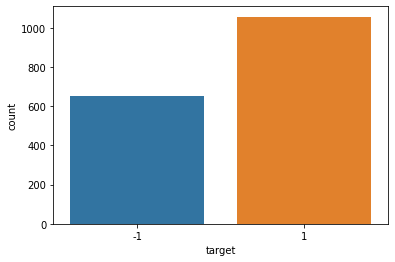

In [139]:
import seaborn as sns
sns.countplot(y_test)

## Training

In [450]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100,criterion = 'gini',max_depth=30,max_features='log2',min_samples_leaf=1,min_samples_split=5)
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=30, max_features='log2', min_samples_split=5)

In [451]:
pred = clf.predict(X_test)

In [452]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test,pred)
cm

array([[319, 335],
       [178, 878]], dtype=int64)

In [453]:
accuracy = accuracy_score(y_test,pred)
accuracy

0.7

In [454]:
train_acc = accuracy_score(y_train,clf.predict(X_train))
train_acc

0.8420128730251609

In [455]:
from sklearn.metrics import classification_report
classification_train = classification_report(y_train, clf.predict(X_train))
print("Classification report:" "\n",classification_train)

Classification report:
               precision    recall  f1-score   support

          -1       0.87      0.70      0.77      1992
           1       0.83      0.93      0.88      3135

    accuracy                           0.84      5127
   macro avg       0.85      0.82      0.83      5127
weighted avg       0.85      0.84      0.84      5127



In [456]:
from sklearn.metrics import classification_report
classification_test = classification_report(y_test, clf.predict(X_test))
print("Classification report:" "\n",classification_test)

Classification report:
               precision    recall  f1-score   support

          -1       0.64      0.49      0.55       654
           1       0.72      0.83      0.77      1056

    accuracy                           0.70      1710
   macro avg       0.68      0.66      0.66      1710
weighted avg       0.69      0.70      0.69      1710



In [457]:
from sklearn.metrics import recall_score
print(recall_score(y_test,pred))

0.8314393939393939


In [458]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
# calculate AUC
auc = roc_auc_score(y_test, pred)
# calculate F1 score
print(f1_score(y_test,pred))
print('AUC: %.3f' % auc)

0.7739092111062141
AUC: 0.660


## Tuning

In [109]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Method of selecting samples for training each tree
# bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='accuracy', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='accuracy', verbose=2)

In [110]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 30}

In [111]:
rf_random

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='accuracy', verbose=2)

In [112]:
best_random_grid=rf_random.best_estimator_

In [113]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[766 310]
 [269 751]]
Accuracy Score 0.7237595419847328
Classification report:               precision    recall  f1-score   support

          -1       0.74      0.71      0.73      1076
           1       0.71      0.74      0.72      1020

    accuracy                           0.72      2096
   macro avg       0.72      0.72      0.72      2096
weighted avg       0.72      0.72      0.72      2096



In [116]:
## XGBOOST
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate =0.1,
 n_estimators=1200,
 max_depth=20,
 min_child_weight=1,
 gamma=0.2,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 eta = 0.5,
 reg_alpha = 1e-5,                
 seed=27)

xgb.fit(X_train,y_train)
xgb.predict(X_test,y_test.all())
print(xgb.score(X_train, y_train))
print(xgb.score(X_test, y_test))

0.792554883868915
0.6965648854961832


In [115]:
from sklearn.metrics import accuracy_score
y_pred_XGB=xgb.predict(X_test)
print(confusion_matrix(y_test,y_pred_XGB))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred_XGB)))
print("Classification report: {}".format(classification_report(y_test,y_pred_XGB)))

[[766 310]
 [305 715]]
Accuracy Score 0.7065839694656488
Classification report:               precision    recall  f1-score   support

          -1       0.72      0.71      0.71      1076
           1       0.70      0.70      0.70      1020

    accuracy                           0.71      2096
   macro avg       0.71      0.71      0.71      2096
weighted avg       0.71      0.71      0.71      2096



## Optuna

In [118]:
import optuna
import sklearn.svm
def objective(trial):

    classifier = trial.suggest_categorical('classifier', ['RandomForest'])
    n_estimators = trial.suggest_int('n_estimators', 600, 800,20)
    max_depth = int(trial.suggest_float('max_depth',25,35))
    min_samples_leaf = int(trial.suggest_float('min_samples_leaf',1,2))
    min_samples_split = int(trial.suggest_float('min_samples_split',1,5))
    max_features = trial.suggest_categorical('max_features', ['auto', 'sqrt','log2'])
    criterion = trial.suggest_categorical('criterion',['gini','entropy']) 
    clf = sklearn.ensemble.RandomForestClassifier(
            n_estimators=n_estimators, 
            max_depth=max_depth,
            min_samples_leaf = min_samples_leaf,
            max_features = max_features,
            criterion = criterion
        )
    return sklearn.model_selection.cross_val_score(
        clf,X_train,y_train, n_jobs=-1, cv=3).mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=500)

trial = study.best_trial

print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

[I 2022-01-14 14:05:23,563] A new study created in memory with name: no-name-5fcf2fe9-0756-4958-8a1d-27e82d7fa902
[I 2022-01-14 14:05:33,629] Trial 0 finished with value: 0.6813544911852406 and parameters: {'classifier': 'RandomForest', 'n_estimators': 680, 'max_depth': 30.531446173486493, 'min_samples_leaf': 1.102390481519698, 'min_samples_split': 2.861975263255933, 'max_features': 'auto', 'criterion': 'entropy'}. Best is trial 0 with value: 0.6813544911852406.
[I 2022-01-14 14:05:41,160] Trial 1 finished with value: 0.6815140556395635 and parameters: {'classifier': 'RandomForest', 'n_estimators': 700, 'max_depth': 29.170746930705526, 'min_samples_leaf': 1.2401166677796711, 'min_samples_split': 4.0008345743969365, 'max_features': 'log2', 'criterion': 'entropy'}. Best is trial 1 with value: 0.6815140556395635.
[I 2022-01-14 14:05:49,299] Trial 2 finished with value: 0.682468254112846 and parameters: {'classifier': 'RandomForest', 'n_estimators': 680, 'max_depth': 26.466338531858977, 'm

[I 2022-01-14 14:08:03,165] Trial 23 finished with value: 0.6810368804921447 and parameters: {'classifier': 'RandomForest', 'n_estimators': 660, 'max_depth': 26.389727079794127, 'min_samples_leaf': 1.4717272011281313, 'min_samples_split': 4.998603187521699, 'max_features': 'log2', 'criterion': 'gini'}. Best is trial 7 with value: 0.6834226044076833.
[I 2022-01-14 14:08:08,807] Trial 24 finished with value: 0.6804008999981782 and parameters: {'classifier': 'RandomForest', 'n_estimators': 680, 'max_depth': 27.105051623533726, 'min_samples_leaf': 1.2284666096050771, 'min_samples_split': 3.7599160510574796, 'max_features': 'log2', 'criterion': 'gini'}. Best is trial 7 with value: 0.6834226044076833.
[I 2022-01-14 14:08:14,436] Trial 25 finished with value: 0.6794468533464507 and parameters: {'classifier': 'RandomForest', 'n_estimators': 640, 'max_depth': 25.849853949809187, 'min_samples_leaf': 1.4263854321275413, 'min_samples_split': 4.595668901872325, 'max_features': 'log2', 'criterion': 

[I 2022-01-14 14:10:41,572] Trial 46 finished with value: 0.683423591247791 and parameters: {'classifier': 'RandomForest', 'n_estimators': 740, 'max_depth': 27.28230061980132, 'min_samples_leaf': 1.5315640775278587, 'min_samples_split': 3.290443134889299, 'max_features': 'auto', 'criterion': 'entropy'}. Best is trial 33 with value: 0.6851731828478081.
[I 2022-01-14 14:10:48,211] Trial 47 finished with value: 0.6832648618120206 and parameters: {'classifier': 'RandomForest', 'n_estimators': 740, 'max_depth': 27.359724320018167, 'min_samples_leaf': 1.5136444634926671, 'min_samples_split': 3.3297646129592176, 'max_features': 'auto', 'criterion': 'entropy'}. Best is trial 33 with value: 0.6851731828478081.
[I 2022-01-14 14:10:55,129] Trial 48 finished with value: 0.6826283499426115 and parameters: {'classifier': 'RandomForest', 'n_estimators': 780, 'max_depth': 26.884669910749054, 'min_samples_leaf': 1.622475903888515, 'min_samples_split': 3.771657938116287, 'max_features': 'auto', 'criteri

[I 2022-01-14 14:13:15,482] Trial 69 finished with value: 0.6804002168011806 and parameters: {'classifier': 'RandomForest', 'n_estimators': 700, 'max_depth': 31.234106090766268, 'min_samples_leaf': 1.2129276420569877, 'min_samples_split': 2.982155264263655, 'max_features': 'auto', 'criterion': 'entropy'}. Best is trial 33 with value: 0.6851731828478081.
[I 2022-01-14 14:13:21,413] Trial 70 finished with value: 0.6829454292602647 and parameters: {'classifier': 'RandomForest', 'n_estimators': 780, 'max_depth': 29.38322825054682, 'min_samples_leaf': 1.5947037860833053, 'min_samples_split': 4.126630366350161, 'max_features': 'log2', 'criterion': 'gini'}. Best is trial 33 with value: 0.6851731828478081.
[I 2022-01-14 14:13:27,981] Trial 71 finished with value: 0.6829467197434823 and parameters: {'classifier': 'RandomForest', 'n_estimators': 760, 'max_depth': 26.30094008023568, 'min_samples_leaf': 1.8787707656229435, 'min_samples_split': 2.7494869053714694, 'max_features': 'auto', 'criterion

[I 2022-01-14 14:16:11,810] Trial 92 finished with value: 0.681355022560683 and parameters: {'classifier': 'RandomForest', 'n_estimators': 800, 'max_depth': 30.578366395933454, 'min_samples_leaf': 1.9677356164131672, 'min_samples_split': 2.246746629679758, 'max_features': 'auto', 'criterion': 'entropy'}. Best is trial 33 with value: 0.6851731828478081.
[I 2022-01-14 14:16:20,197] Trial 93 finished with value: 0.683899931376657 and parameters: {'classifier': 'RandomForest', 'n_estimators': 800, 'max_depth': 32.945174827225564, 'min_samples_leaf': 1.7285478149260916, 'min_samples_split': 2.477057985759393, 'max_features': 'auto', 'criterion': 'entropy'}. Best is trial 33 with value: 0.6851731828478081.
[I 2022-01-14 14:16:28,410] Trial 94 finished with value: 0.6808777715024869 and parameters: {'classifier': 'RandomForest', 'n_estimators': 780, 'max_depth': 32.87945789219973, 'min_samples_leaf': 1.729219375795301, 'min_samples_split': 2.457718833985101, 'max_features': 'auto', 'criterion

[I 2022-01-14 14:19:05,435] Trial 115 finished with value: 0.6832637990611355 and parameters: {'classifier': 'RandomForest', 'n_estimators': 780, 'max_depth': 32.41978881571082, 'min_samples_leaf': 1.8947266100602282, 'min_samples_split': 2.5249432268555827, 'max_features': 'auto', 'criterion': 'entropy'}. Best is trial 99 with value: 0.6853325195697985.
[I 2022-01-14 14:19:12,791] Trial 116 finished with value: 0.681513676085676 and parameters: {'classifier': 'RandomForest', 'n_estimators': 760, 'max_depth': 30.723841264663424, 'min_samples_leaf': 1.8652266553251085, 'min_samples_split': 2.63665650956096, 'max_features': 'auto', 'criterion': 'entropy'}. Best is trial 99 with value: 0.6853325195697985.
[I 2022-01-14 14:19:19,079] Trial 117 finished with value: 0.6792869852490178 and parameters: {'classifier': 'RandomForest', 'n_estimators': 600, 'max_depth': 34.531241996688756, 'min_samples_leaf': 1.9674111463821746, 'min_samples_split': 3.0549727874141763, 'max_features': 'auto', 'cri

[I 2022-01-14 14:22:01,062] Trial 138 finished with value: 0.6808779992348194 and parameters: {'classifier': 'RandomForest', 'n_estimators': 760, 'max_depth': 26.86842127048402, 'min_samples_leaf': 1.256130332786819, 'min_samples_split': 3.502385052639913, 'max_features': 'auto', 'criterion': 'entropy'}. Best is trial 125 with value: 0.6861280645180879.
[I 2022-01-14 14:22:08,446] Trial 139 finished with value: 0.6788094305477115 and parameters: {'classifier': 'RandomForest', 'n_estimators': 780, 'max_depth': 26.634333636791983, 'min_samples_leaf': 1.0566675917078308, 'min_samples_split': 3.2136263089492973, 'max_features': 'auto', 'criterion': 'gini'}. Best is trial 125 with value: 0.6861280645180879.
[I 2022-01-14 14:22:15,804] Trial 140 finished with value: 0.6834232116939033 and parameters: {'classifier': 'RandomForest', 'n_estimators': 740, 'max_depth': 27.3649151983322, 'min_samples_leaf': 1.0797028933026815, 'min_samples_split': 3.39729490904317, 'max_features': 'auto', 'criteri

[I 2022-01-14 14:24:43,278] Trial 161 finished with value: 0.682309448766298 and parameters: {'classifier': 'RandomForest', 'n_estimators': 800, 'max_depth': 32.71009775693001, 'min_samples_leaf': 1.9373671076887429, 'min_samples_split': 2.4548529370352763, 'max_features': 'auto', 'criterion': 'entropy'}. Best is trial 125 with value: 0.6861280645180879.
[I 2022-01-14 14:24:51,695] Trial 162 finished with value: 0.6831053732684751 and parameters: {'classifier': 'RandomForest', 'n_estimators': 800, 'max_depth': 30.218454944785474, 'min_samples_leaf': 1.8400503721104033, 'min_samples_split': 2.2209488947748413, 'max_features': 'auto', 'criterion': 'entropy'}. Best is trial 125 with value: 0.6861280645180879.
[I 2022-01-14 14:25:00,406] Trial 163 finished with value: 0.6842195157499681 and parameters: {'classifier': 'RandomForest', 'n_estimators': 800, 'max_depth': 26.61892036394216, 'min_samples_leaf': 1.9036417839902404, 'min_samples_split': 2.3409553627026027, 'max_features': 'auto', '

[I 2022-01-14 14:27:42,639] Trial 184 finished with value: 0.678810113744709 and parameters: {'classifier': 'RandomForest', 'n_estimators': 740, 'max_depth': 26.936709845944822, 'min_samples_leaf': 1.106297518165209, 'min_samples_split': 3.3896495703508847, 'max_features': 'auto', 'criterion': 'entropy'}. Best is trial 125 with value: 0.6861280645180879.
[I 2022-01-14 14:27:49,507] Trial 185 finished with value: 0.680718814334384 and parameters: {'classifier': 'RandomForest', 'n_estimators': 760, 'max_depth': 30.941606239731104, 'min_samples_leaf': 1.8191254783490471, 'min_samples_split': 3.073711791456745, 'max_features': 'auto', 'criterion': 'entropy'}. Best is trial 125 with value: 0.6861280645180879.
[I 2022-01-14 14:27:56,438] Trial 186 finished with value: 0.6827873830214918 and parameters: {'classifier': 'RandomForest', 'n_estimators': 780, 'max_depth': 27.330999138169993, 'min_samples_leaf': 1.0411987853969964, 'min_samples_split': 3.4600339896255963, 'max_features': 'sqrt', 'c

[I 2022-01-14 14:30:13,755] Trial 207 finished with value: 0.683423591247791 and parameters: {'classifier': 'RandomForest', 'n_estimators': 780, 'max_depth': 26.759924005896462, 'min_samples_leaf': 1.4559656096644915, 'min_samples_split': 3.2299894767576065, 'max_features': 'auto', 'criterion': 'entropy'}. Best is trial 125 with value: 0.6861280645180879.
[I 2022-01-14 14:30:20,526] Trial 208 finished with value: 0.6827879143969344 and parameters: {'classifier': 'RandomForest', 'n_estimators': 780, 'max_depth': 26.755961910825647, 'min_samples_leaf': 1.539015040274868, 'min_samples_split': 3.2527425397473273, 'max_features': 'auto', 'criterion': 'entropy'}. Best is trial 125 with value: 0.6861280645180879.
[I 2022-01-14 14:30:27,612] Trial 209 finished with value: 0.680718966155939 and parameters: {'classifier': 'RandomForest', 'n_estimators': 780, 'max_depth': 27.013914992945967, 'min_samples_leaf': 1.435851826260445, 'min_samples_split': 3.1653162727385866, 'max_features': 'auto', 'c

[I 2022-01-14 14:32:50,572] Trial 230 finished with value: 0.6834238189801235 and parameters: {'classifier': 'RandomForest', 'n_estimators': 740, 'max_depth': 27.09441662748057, 'min_samples_leaf': 1.1447868515958546, 'min_samples_split': 3.3447817584039283, 'max_features': 'auto', 'criterion': 'entropy'}. Best is trial 125 with value: 0.6861280645180879.
[I 2022-01-14 14:32:57,180] Trial 231 finished with value: 0.6839014495922072 and parameters: {'classifier': 'RandomForest', 'n_estimators': 740, 'max_depth': 27.083687290856016, 'min_samples_leaf': 1.1345129850871662, 'min_samples_split': 3.348768487525283, 'max_features': 'auto', 'criterion': 'entropy'}. Best is trial 125 with value: 0.6861280645180879.
[I 2022-01-14 14:33:04,037] Trial 232 finished with value: 0.6846960077003893 and parameters: {'classifier': 'RandomForest', 'n_estimators': 740, 'max_depth': 27.06523099830983, 'min_samples_leaf': 1.63579782751531, 'min_samples_split': 3.4046955213597165, 'max_features': 'auto', 'cr

[I 2022-01-14 14:35:22,200] Trial 253 finished with value: 0.6823107392495157 and parameters: {'classifier': 'RandomForest', 'n_estimators': 760, 'max_depth': 26.40379288253987, 'min_samples_leaf': 1.9811636571220907, 'min_samples_split': 2.551583844154861, 'max_features': 'auto', 'criterion': 'entropy'}. Best is trial 125 with value: 0.6861280645180879.
[I 2022-01-14 14:35:28,853] Trial 254 finished with value: 0.6826282740318339 and parameters: {'classifier': 'RandomForest', 'n_estimators': 760, 'max_depth': 26.117255790904075, 'min_samples_leaf': 1.9928219494471935, 'min_samples_split': 2.4500623219739293, 'max_features': 'auto', 'criterion': 'entropy'}. Best is trial 125 with value: 0.6861280645180879.
[I 2022-01-14 14:35:35,327] Trial 255 finished with value: 0.6821504156874175 and parameters: {'classifier': 'RandomForest', 'n_estimators': 760, 'max_depth': 26.535438326481813, 'min_samples_leaf': 1.5803343340238043, 'min_samples_split': 2.605535339528265, 'max_features': 'auto', '

[I 2022-01-14 14:37:54,880] Trial 276 finished with value: 0.682309448766298 and parameters: {'classifier': 'RandomForest', 'n_estimators': 740, 'max_depth': 27.307166766911415, 'min_samples_leaf': 1.1087782977895904, 'min_samples_split': 1.8261068048246716, 'max_features': 'auto', 'criterion': 'entropy'}. Best is trial 258 with value: 0.686128519982753.
[I 2022-01-14 14:38:01,787] Trial 277 finished with value: 0.6810373359568098 and parameters: {'classifier': 'RandomForest', 'n_estimators': 760, 'max_depth': 27.16423849393755, 'min_samples_leaf': 1.9477752424842059, 'min_samples_split': 2.6975653871580425, 'max_features': 'auto', 'criterion': 'entropy'}. Best is trial 258 with value: 0.686128519982753.
[I 2022-01-14 14:38:08,701] Trial 278 finished with value: 0.6835831557021139 and parameters: {'classifier': 'RandomForest', 'n_estimators': 760, 'max_depth': 26.875681697261072, 'min_samples_leaf': 1.9168546650614655, 'min_samples_split': 2.533789716643921, 'max_features': 'auto', 'cr

[I 2022-01-14 14:40:32,832] Trial 299 finished with value: 0.6835830797913364 and parameters: {'classifier': 'RandomForest', 'n_estimators': 700, 'max_depth': 25.39487120130756, 'min_samples_leaf': 1.8267020917524543, 'min_samples_split': 4.654905117982714, 'max_features': 'sqrt', 'criterion': 'entropy'}. Best is trial 258 with value: 0.686128519982753.
[I 2022-01-14 14:40:40,777] Trial 300 finished with value: 0.6818323495296568 and parameters: {'classifier': 'RandomForest', 'n_estimators': 700, 'max_depth': 25.540836496161205, 'min_samples_leaf': 1.83902187892431, 'min_samples_split': 4.842552242583697, 'max_features': 'sqrt', 'criterion': 'entropy'}. Best is trial 258 with value: 0.686128519982753.
[I 2022-01-14 14:40:48,209] Trial 301 finished with value: 0.6824688613990659 and parameters: {'classifier': 'RandomForest', 'n_estimators': 700, 'max_depth': 25.354168956763008, 'min_samples_leaf': 1.8759476921073412, 'min_samples_split': 4.579859917258679, 'max_features': 'sqrt', 'crite

[I 2022-01-14 14:43:29,891] Trial 322 finished with value: 0.6846967668081643 and parameters: {'classifier': 'RandomForest', 'n_estimators': 760, 'max_depth': 26.423638733193666, 'min_samples_leaf': 1.6173966444258228, 'min_samples_split': 2.615930251080582, 'max_features': 'auto', 'criterion': 'entropy'}. Best is trial 258 with value: 0.686128519982753.
[I 2022-01-14 14:43:38,158] Trial 323 finished with value: 0.685014832965925 and parameters: {'classifier': 'RandomForest', 'n_estimators': 760, 'max_depth': 26.194326048273314, 'min_samples_leaf': 1.6181228217065322, 'min_samples_split': 2.62250036797735, 'max_features': 'auto', 'criterion': 'entropy'}. Best is trial 258 with value: 0.686128519982753.
[I 2022-01-14 14:43:45,646] Trial 324 finished with value: 0.6807195734421589 and parameters: {'classifier': 'RandomForest', 'n_estimators': 760, 'max_depth': 26.311502134572148, 'min_samples_leaf': 1.6476446063426176, 'min_samples_split': 2.817704409075736, 'max_features': 'auto', 'crit

[I 2022-01-14 14:46:11,883] Trial 345 finished with value: 0.681514587015006 and parameters: {'classifier': 'RandomForest', 'n_estimators': 760, 'max_depth': 26.655695216493935, 'min_samples_leaf': 1.1885842962327142, 'min_samples_split': 2.553623304710568, 'max_features': 'auto', 'criterion': 'gini'}. Best is trial 258 with value: 0.686128519982753.
[I 2022-01-14 14:46:18,969] Trial 346 finished with value: 0.6821507952413052 and parameters: {'classifier': 'RandomForest', 'n_estimators': 760, 'max_depth': 26.89655220018904, 'min_samples_leaf': 1.251925990091151, 'min_samples_split': 2.3267814512713008, 'max_features': 'auto', 'criterion': 'gini'}. Best is trial 258 with value: 0.686128519982753.
[I 2022-01-14 14:46:25,426] Trial 347 finished with value: 0.6791281039916924 and parameters: {'classifier': 'RandomForest', 'n_estimators': 760, 'max_depth': 26.476665695401547, 'min_samples_leaf': 1.2186135992578402, 'min_samples_split': 2.2671084226506526, 'max_features': 'sqrt', 'criterion

[I 2022-01-14 14:48:57,374] Trial 368 finished with value: 0.6804007481766231 and parameters: {'classifier': 'RandomForest', 'n_estimators': 760, 'max_depth': 27.43222575741379, 'min_samples_leaf': 1.6090226819450504, 'min_samples_split': 2.5783994875990515, 'max_features': 'auto', 'criterion': 'entropy'}. Best is trial 258 with value: 0.686128519982753.
[I 2022-01-14 14:49:04,503] Trial 369 finished with value: 0.6851740178663605 and parameters: {'classifier': 'RandomForest', 'n_estimators': 740, 'max_depth': 26.18976946031025, 'min_samples_leaf': 1.2834156995166757, 'min_samples_split': 2.8482449998363473, 'max_features': 'auto', 'criterion': 'entropy'}. Best is trial 258 with value: 0.686128519982753.
[I 2022-01-14 14:49:11,592] Trial 370 finished with value: 0.6839007663952098 and parameters: {'classifier': 'RandomForest', 'n_estimators': 740, 'max_depth': 26.693469679490715, 'min_samples_leaf': 1.2852449634358192, 'min_samples_split': 2.8310155867731304, 'max_features': 'auto', 'c

[I 2022-01-14 14:51:53,085] Trial 391 finished with value: 0.6786515361304937 and parameters: {'classifier': 'RandomForest', 'n_estimators': 760, 'max_depth': 25.31672706329027, 'min_samples_leaf': 1.6579584080528194, 'min_samples_split': 2.605039485789018, 'max_features': 'sqrt', 'criterion': 'entropy'}. Best is trial 258 with value: 0.686128519982753.
[I 2022-01-14 14:52:00,312] Trial 392 finished with value: 0.6821510229736377 and parameters: {'classifier': 'RandomForest', 'n_estimators': 740, 'max_depth': 26.571379579435202, 'min_samples_leaf': 1.174838982984833, 'min_samples_split': 3.3487796123221956, 'max_features': 'auto', 'criterion': 'entropy'}. Best is trial 258 with value: 0.686128519982753.
[I 2022-01-14 14:52:07,290] Trial 393 finished with value: 0.6783321035787377 and parameters: {'classifier': 'RandomForest', 'n_estimators': 720, 'max_depth': 27.539382707268803, 'min_samples_leaf': 1.97509315723467, 'min_samples_split': 2.4662668810669404, 'max_features': 'auto', 'crit

[I 2022-01-14 14:54:40,008] Trial 414 finished with value: 0.6773785123916753 and parameters: {'classifier': 'RandomForest', 'n_estimators': 720, 'max_depth': 25.6621620074233, 'min_samples_leaf': 1.972070721292371, 'min_samples_split': 3.92821615581899, 'max_features': 'auto', 'criterion': 'entropy'}. Best is trial 258 with value: 0.686128519982753.
[I 2022-01-14 14:54:52,720] Trial 415 finished with value: 0.6792872129813502 and parameters: {'classifier': 'RandomForest', 'n_estimators': 760, 'max_depth': 29.015807222576083, 'min_samples_leaf': 1.1461874968042143, 'min_samples_split': 2.8348914823202946, 'max_features': 'auto', 'criterion': 'entropy'}. Best is trial 258 with value: 0.686128519982753.
[I 2022-01-14 14:55:07,491] Trial 416 finished with value: 0.682469316863731 and parameters: {'classifier': 'RandomForest', 'n_estimators': 780, 'max_depth': 26.1389931941322, 'min_samples_leaf': 1.448725368929846, 'min_samples_split': 2.4838161986889564, 'max_features': 'auto', 'criterio

[I 2022-01-14 14:58:00,734] Trial 437 finished with value: 0.6818328049943219 and parameters: {'classifier': 'RandomForest', 'n_estimators': 740, 'max_depth': 27.82551337127058, 'min_samples_leaf': 1.659576919409069, 'min_samples_split': 2.648766064222049, 'max_features': 'auto', 'criterion': 'entropy'}. Best is trial 258 with value: 0.686128519982753.
[I 2022-01-14 14:58:07,363] Trial 438 finished with value: 0.6840597994740901 and parameters: {'classifier': 'RandomForest', 'n_estimators': 700, 'max_depth': 26.919655815184424, 'min_samples_leaf': 1.1942937816081576, 'min_samples_split': 3.3533189715407814, 'max_features': 'sqrt', 'criterion': 'entropy'}. Best is trial 258 with value: 0.686128519982753.
[I 2022-01-14 14:58:14,086] Trial 439 finished with value: 0.6807194216206041 and parameters: {'classifier': 'RandomForest', 'n_estimators': 700, 'max_depth': 25.49572586707338, 'min_samples_leaf': 1.6014157120994905, 'min_samples_split': 3.2528933081282863, 'max_features': 'sqrt', 'cri

[I 2022-01-14 15:00:41,722] Trial 460 finished with value: 0.6835825484158939 and parameters: {'classifier': 'RandomForest', 'n_estimators': 800, 'max_depth': 25.174279784963293, 'min_samples_leaf': 1.0464541991231435, 'min_samples_split': 3.2977000495751247, 'max_features': 'sqrt', 'criterion': 'entropy'}. Best is trial 258 with value: 0.686128519982753.
[I 2022-01-14 15:00:49,402] Trial 461 finished with value: 0.6840594958309801 and parameters: {'classifier': 'RandomForest', 'n_estimators': 700, 'max_depth': 31.16979361593156, 'min_samples_leaf': 1.1177384982946381, 'min_samples_split': 3.803758571128586, 'max_features': 'auto', 'criterion': 'entropy'}. Best is trial 258 with value: 0.686128519982753.
[I 2022-01-14 15:00:58,871] Trial 462 finished with value: 0.6831046141607001 and parameters: {'classifier': 'RandomForest', 'n_estimators': 700, 'max_depth': 31.63392414449358, 'min_samples_leaf': 1.4923638324431683, 'min_samples_split': 3.9913434734309767, 'max_features': 'auto', 'cr

[I 2022-01-14 15:03:21,637] Trial 483 finished with value: 0.6835828520590038 and parameters: {'classifier': 'RandomForest', 'n_estimators': 740, 'max_depth': 26.63192916489508, 'min_samples_leaf': 1.6325092613884347, 'min_samples_split': 3.0529435280704917, 'max_features': 'auto', 'criterion': 'entropy'}. Best is trial 258 with value: 0.686128519982753.
[I 2022-01-14 15:03:28,657] Trial 484 finished with value: 0.6823099801417406 and parameters: {'classifier': 'RandomForest', 'n_estimators': 780, 'max_depth': 27.034923379742878, 'min_samples_leaf': 1.5512707449484986, 'min_samples_split': 2.620028837487452, 'max_features': 'auto', 'criterion': 'entropy'}. Best is trial 258 with value: 0.686128519982753.
[I 2022-01-14 15:03:34,523] Trial 485 finished with value: 0.6808772401270442 and parameters: {'classifier': 'RandomForest', 'n_estimators': 620, 'max_depth': 30.257221939483625, 'min_samples_leaf': 1.9240096158611948, 'min_samples_split': 3.572233781286209, 'max_features': 'auto', 'cr

Accuracy: 0.686128519982753
Best hyperparameters: {'classifier': 'RandomForest', 'n_estimators': 760, 'max_depth': 26.324121594328336, 'min_samples_leaf': 1.655428517692259, 'min_samples_split': 3.1743756107093497, 'max_features': 'sqrt', 'criterion': 'entropy'}


In [119]:
study.best_params

{'classifier': 'RandomForest',
 'n_estimators': 760,
 'max_depth': 26.324121594328336,
 'min_samples_leaf': 1.655428517692259,
 'min_samples_split': 3.1743756107093497,
 'max_features': 'sqrt',
 'criterion': 'entropy'}

In [121]:
rf=RandomForestClassifier(n_estimators=760,
                          max_depth=26.324121594328336,
                         min_samples_split = 3,
                         min_samples_leaf = 2,
                         max_features = 'sqrt',
                         criterion ='entropy')
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=26.324121594328336,
                       max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=3, n_estimators=760)

In [122]:
y_pred=rf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[727 349]
 [277 743]]
0.7013358778625954
              precision    recall  f1-score   support

          -1       0.72      0.68      0.70      1076
           1       0.68      0.73      0.70      1020

    accuracy                           0.70      2096
   macro avg       0.70      0.70      0.70      2096
weighted avg       0.70      0.70      0.70      2096



In [124]:
from sklearn.metrics import classification_report
print(accuracy_score(y_train, rf.predict(X_train)))
classification_train1 = classification_report(y_train, rf.predict(X_train))
print("Classification report:" "\n",classification_train1)

0.82532612153993
Classification report:
               precision    recall  f1-score   support

          -1       0.84      0.80      0.82      3115
           1       0.81      0.85      0.83      3171

    accuracy                           0.83      6286
   macro avg       0.83      0.83      0.83      6286
weighted avg       0.83      0.83      0.83      6286



In [132]:
from sklearn.svm import SVC
svc = SVC(kernel='linear').fit(X_train,y_train)

In [133]:
svc.score(X_train,y_train)

0.6140629971364938

In [134]:
svc.score(X_test,y_test)

0.5973282442748091

In [213]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier().fit(X_train,y_train)

C:\Users\narendra\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [214]:
from sklearn.metrics import classification_report
print(accuracy_score(y_train, mlp.predict(X_train)))
classification_train11 = classification_report(y_train, mlp.predict(X_train))
print("Classification report:" "\n",classification_train11)

0.8418178271893895
Classification report:
               precision    recall  f1-score   support

          -1       0.84      0.74      0.78      1992
           1       0.84      0.91      0.88      3135

    accuracy                           0.84      5127
   macro avg       0.84      0.82      0.83      5127
weighted avg       0.84      0.84      0.84      5127



In [215]:
print(accuracy_score(y_test, mlp.predict(X_test)))
classification_test = classification_report(y_test, mlp.predict(X_test))
print("Classification report:" "\n",classification_test)

0.6573099415204678
Classification report:
               precision    recall  f1-score   support

          -1       0.56      0.50      0.53       654
           1       0.71      0.75      0.73      1056

    accuracy                           0.66      1710
   macro avg       0.63      0.63      0.63      1710
weighted avg       0.65      0.66      0.65      1710



In [216]:
y_pred1=mlp.predict(X_test)
print(confusion_matrix(y_test,y_pred1))

[[330 324]
 [262 794]]


In [217]:
from sklearn.metrics import recall_score
print(recall_score(y_test,y_pred1))

0.7518939393939394


In [218]:
from sklearn.metrics import roc_auc_score

# calculate AUC
auc = roc_auc_score(y_test, pred)
print('AUC: %.3f' % auc)

AUC: 0.629
